### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 2
popsize = 10
generations = 500
batch_size = 8
wrap_around = True
name = 'centered8'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, batch_size, True, popsize)

2023-03-01 12:34:17,163	INFO worker.py:1528 -- Started a local Ray instance.


[2023-03-01 12:34:19] INFO     <90479> evotorch.core: Instance of `Custom_NEProblem` (id:11289562704) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-01 12:34:19] INFO     <90479> evotorch.core: Instance of `Custom_NEProblem` (id:11289562704) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-01 12:34:19] INFO     <90479> evotorch.core: Instance of `Custom_NEProblem` (id:11289562704) -- The `device` of the problem is set as cpu
[2023-03-01 12:34:19] INFO     <90479> evotorch.core: Instance of `Custom_NEProblem` (id:11289562704) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-01 12:34:19] INFO     <90479> evotorch.core: Instance of `Custom_NEProblem` (id:11289562704) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0989)
    mean_eval : 2.862499952316284
pop_best_eval : 3.75
  median_eval : 2.75

         iter : 2
     stepsize : ReadOnlyTensor(0.0979)
    mean_eval : 2.3499999046325684
pop_best_eval : 4.0
  median_eval : 2.25

         iter : 3
     stepsize : ReadOnlyTensor(0.0970)
    mean_eval : 3.112499952316284
pop_best_eval : 4.75
  median_eval : 3.0

         iter : 4
     stepsize : ReadOnlyTensor(0.0961)
    mean_eval : 2.737499952316284
pop_best_eval : 3.5
  median_eval : 2.625

         iter : 5
     stepsize : ReadOnlyTensor(0.0953)
    mean_eval : 3.262500047683716
pop_best_eval : 4.625
  median_eval : 3.0



In [ ]:
network = trainer.get_trained_network()

In [ ]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj4_pop_best'])

In [ ]:
#trainer.searcher.status

#### Visualize trained network

In [ ]:
graphs = [generate_organism(n, device).toGraph() for _ in range(1)]
loader = DataLoader(graphs, batch_size=2)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around)
network.batch_size = 1
network(graph, 0)

DataBatch(x=[22, 5], edge_index=[1, 0], device=[1], subsize=[1], energy=[1], velocity=[1], border_cost=[1], food_reward=[1], dead_cost=[1], visible_food=[1], food_avg_dist=[1], food_avg_degree=[1], batch=[22], ptr=[2])

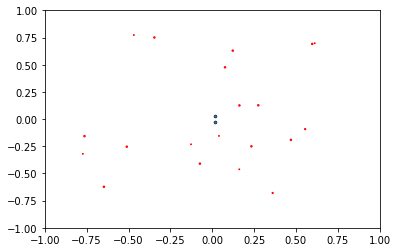

In [ ]:
anim = visualizer.animate_organism(graph, network, food=30, frames=200)
visualizer.save_animation_to_gif(anim, name, 10)

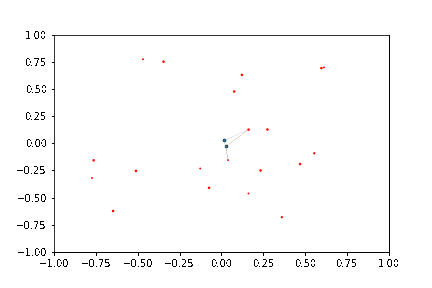

In [ ]:
Image('../animation/' + name + '.gif')

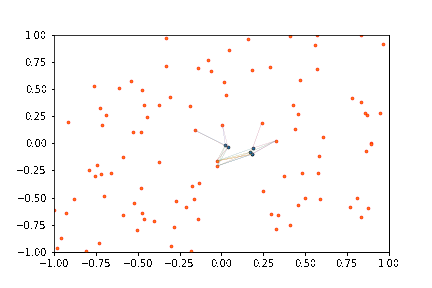

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(4, dim=4)
  (conv_layer_food): CGConv(4, dim=4)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
  )
  (mlp_middle): Sequential(
    (0): Tanh()
    (1): Linear(in_features=8, out_features=4, bias=True)
    (2): Tanh()
  )
  (mlp): Sequential(
    (0): Tanh()
    (1): Linear(in_features=4, out_features=2, bias=True)
    (2): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_z): ChebConv(4, 4, K=1, normalization=sym)
    (conv_x_r): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_r): ChebConv(4, 4, K=1, normalization=sym)
    (conv_x_h): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_h): ChebConv(4, 4, K=1, normalization=sym)
  )
)


In [ ]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

conv_layers1:  CGConv(4, dim=4)
tensor([[-0.4612, -0.3254, -0.8654,  0.1116,  0.3103,  0.5248, -0.0398, -0.0659,
          0.2340,  0.2110,  0.9366,  0.3922],
        [-0.4030,  0.3087,  0.3735, -0.3600,  0.0096, -0.1738, -0.3025, -0.6554,
          0.3590, -0.0411, -0.0080, -0.2269],
        [ 0.0969, -0.0416,  0.0424,  0.1057,  0.2401, -0.0070,  0.4199, -0.1975,
         -0.1934, -0.0106, -0.3606,  0.1254],
        [ 0.4731, -0.0619, -0.5033,  0.0736, -0.3548, -0.3900,  0.0483,  0.0275,
         -0.1712, -0.1762, -0.2360, -0.0037]])
tensor([-0.3833,  0.3812, -0.0920,  0.1988])
tensor([[ 0.1560,  0.4420,  0.2551,  0.3341,  0.2419, -0.5826,  0.1616, -0.3439,
         -0.3371, -0.0160, -0.5594, -0.3282],
        [ 0.1149,  0.5435,  0.4437,  0.4682, -0.0312,  0.3588,  0.4952, -0.2762,
          0.5113, -0.2351, -0.0032, -0.5465],
        [-0.9475,  0.0968, -0.3059,  0.6084, -0.0478,  0.0266, -0.0840, -0.2807,
          0.2345,  0.5137,  0.0506, -0.3614],
        [-0.1608,  0.2411, -0.247

In [ ]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_z): ChebConv(4, 4, K=1, normalization=sym)
  (conv_x_r): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_r): ChebConv(4, 4, K=1, normalization=sym)
  (conv_x_h): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_h): ChebConv(4, 4, K=1, normalization=sym)
)
tensor([ 0.2916, -0.0570,  0.3137, -0.2755])
tensor([[-0.2057,  0.3438, -0.3573, -0.0300],
        [-0.0679, -0.0743,  0.0916, -0.7539],
        [-0.2893,  0.3423,  0.0238, -0.4615],
        [-0.7666, -0.0533, -0.3717,  0.0894]])
tensor([-0.2484,  0.1503,  0.2334, -0.2986])
tensor([[-0.0267, -0.0576,  0.0960,  0.2090],
        [-0.3991,  0.6328,  0.3674,  0.3603],
        [-0.6777,  0.0344, -0.4165, -0.0224],
        [ 0.1983,  0.2968, -0.0035, -0.2601]])
tensor([-0.2823,  0.4497, -0.4244,  0.0653])
tensor([[-0.3038,  0.1019,  0.0250,  0.6407],
        [-0.3075, -0.8792,  0.1159,  0.3107],
        [ 0.3501, -0.2706, -0.0945, -0.6888],
        [-0.3217

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
print(losses)
#plt.plot(losses.stepsize)

#plt.plot(losses.median_eval)
#plt.plot(losses.pop_best_eval)
#plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

                    stepsize  mean_eval  pop_best_eval  median_eval
iter                                                               
1     ReadOnlyTensor(0.0989)     4.0125          5.125        3.750
2     ReadOnlyTensor(0.0979)     2.8625          4.250        2.625
3     ReadOnlyTensor(0.0970)     3.8000          5.375        3.750
4     ReadOnlyTensor(0.0961)     3.1750          4.125        3.125
5     ReadOnlyTensor(0.0953)     3.7875          5.500        3.625
6     ReadOnlyTensor(0.0946)     3.9625          6.375        3.875
7     ReadOnlyTensor(0.0939)     3.4250          4.875        3.375
8     ReadOnlyTensor(0.0932)     4.0000          5.000        3.875
9     ReadOnlyTensor(0.0926)     3.9625          4.750        3.750
10    ReadOnlyTensor(0.0919)     2.4750          3.750        2.625
11    ReadOnlyTensor(0.0914)     4.1250          5.375        4.250
12    ReadOnlyTensor(0.0908)     3.5875          5.375        3.250
13    ReadOnlyTensor(0.0903)     3.0000         

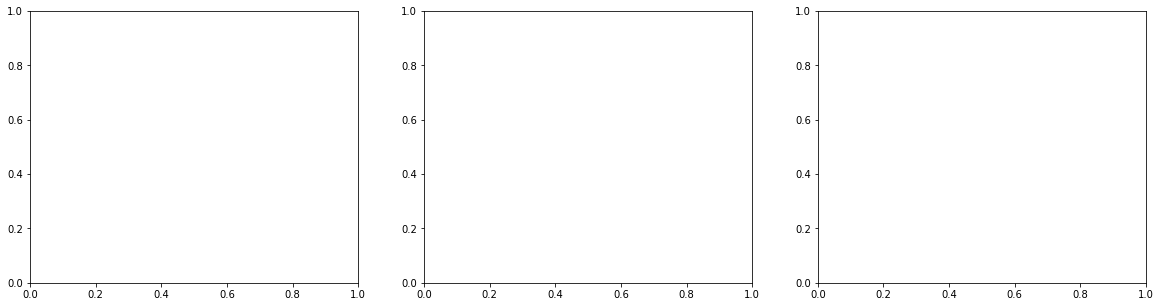

In [ ]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()